# Tipping points
Some simple animations to help get some intuition for 3 types of tipping

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
from time_dependant_model import model, cmap

### Stationary Model (no parameter change)

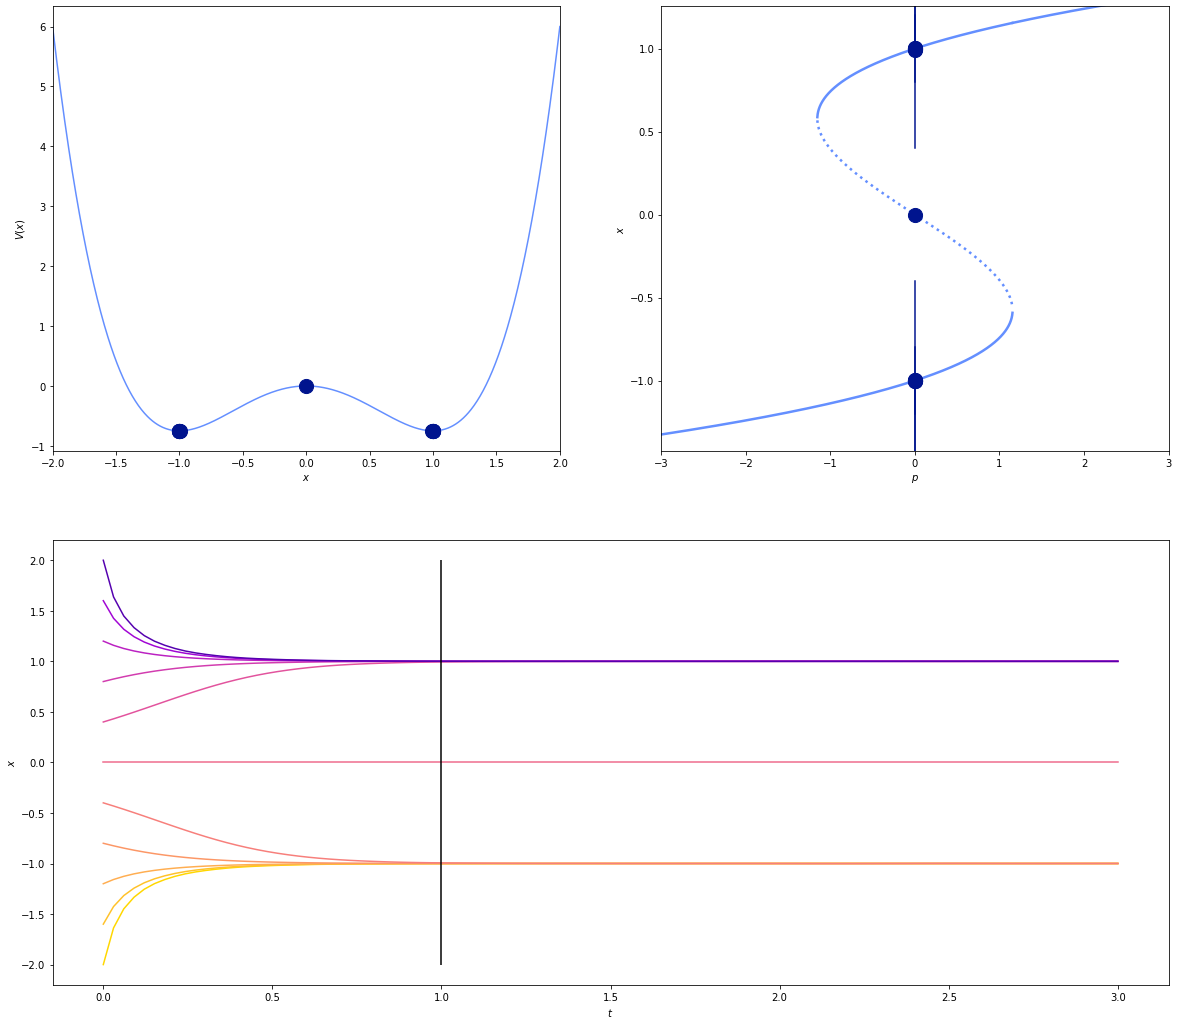

In [3]:
stationary_model = model(a=3)
ani = stationary_model.plot_composite(ics=np.linspace(-2, 2, 11), t=1)

## Bifurcation Tipping
Definding a simple change in parameter value

In [4]:
def p_var(t):
    p_values = np.zeros_like(t) 
    p_values[t > 59] = 0.48 
    mask = (t >= 1) & (t <= 59)
    p_values[mask] = 0.48 * 1/58 * (t[mask] - 1)
    
    return p_values

In [6]:
b_tipping_model = model(p_in_time=p_var)

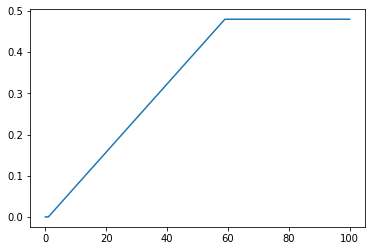

In [8]:
t = np.linspace(0, 100, 1000)
plt.plot(t, b_tipping_model._p_func(t))

(<Figure size 1440x1296 with 3 Axes>, <AxesSubplot:>)

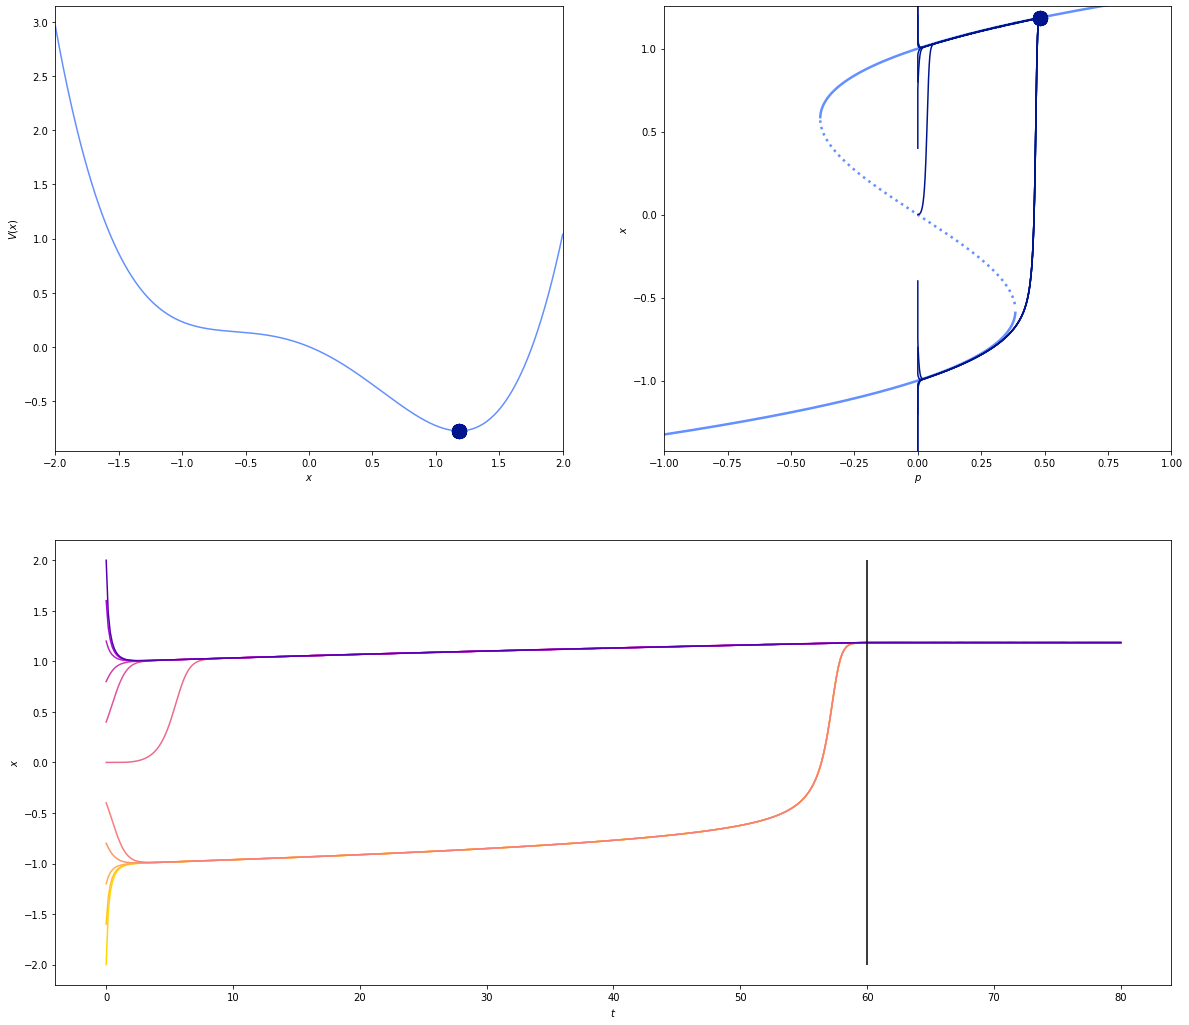

In [9]:
t = 60
b_tipping_model.plot_composite(ics=np.linspace(-2, 2, 11), t_traj=np.linspace(0, 80, 500), t=t)

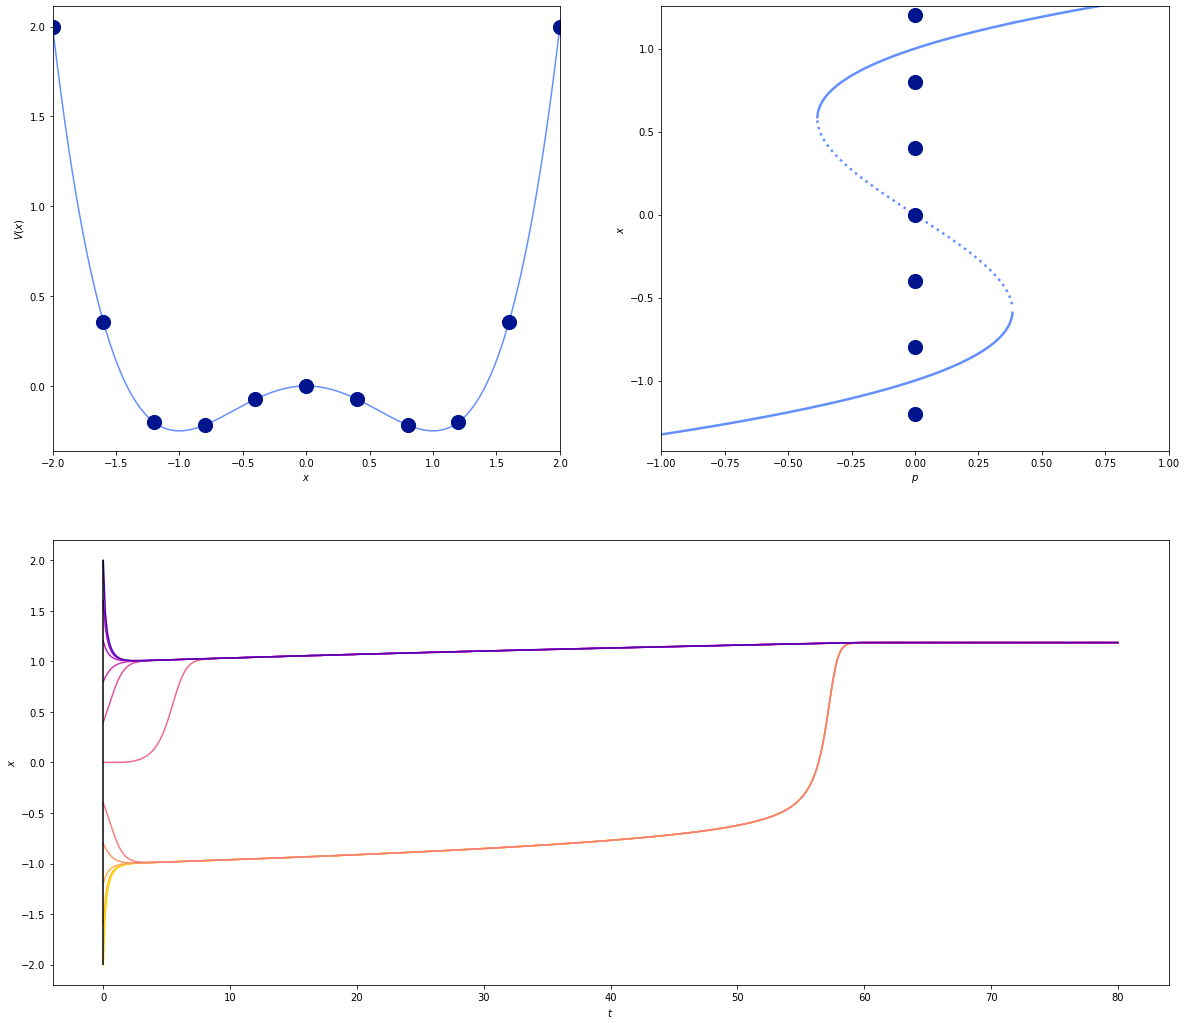

In [10]:
ani = b_tipping_model.animate_composite(ics=np.linspace(-2, 2, 11), t=np.linspace(0, 80, 500))

In [11]:
# ani.save("b_tipping.mp4")

#### Historisis
Showing irriversibity of tipping

In [12]:
def p_var(t):
    p_values = np.zeros_like(t) 
    p_values[t > 59] = 0.48 
    mask = (t >= 1) & (t <= 59)
    p_values[mask] = 0.48 * 1/58 * (t[mask] - 1)
    
    # ramp down
    
    mask = (t >= 70) & (t <= 130)
    p_values[mask] = 0.48 * (1 - 1/30 * (t[mask] -70))
    
    p_values[t>130] = -0.48
    
    # ramp back up
    mask = (t >= 130) & (t <= 160)
    p_values[mask] = 0.48 * 1/30 * (t[mask] - 130) - 0.48
    
    p_values[t>160] = 0
    
    
    return p_values

In [13]:
b_tipping_model = model(p_in_time=p_var)

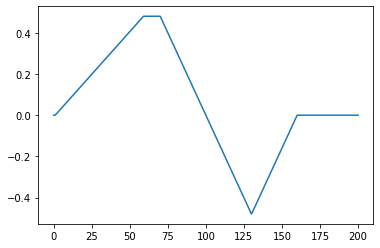

In [14]:
t = np.linspace(0, 200, 1000)
plt.plot(t, b_tipping_model._p_func(t))

(<Figure size 1440x1296 with 3 Axes>, <AxesSubplot:>)

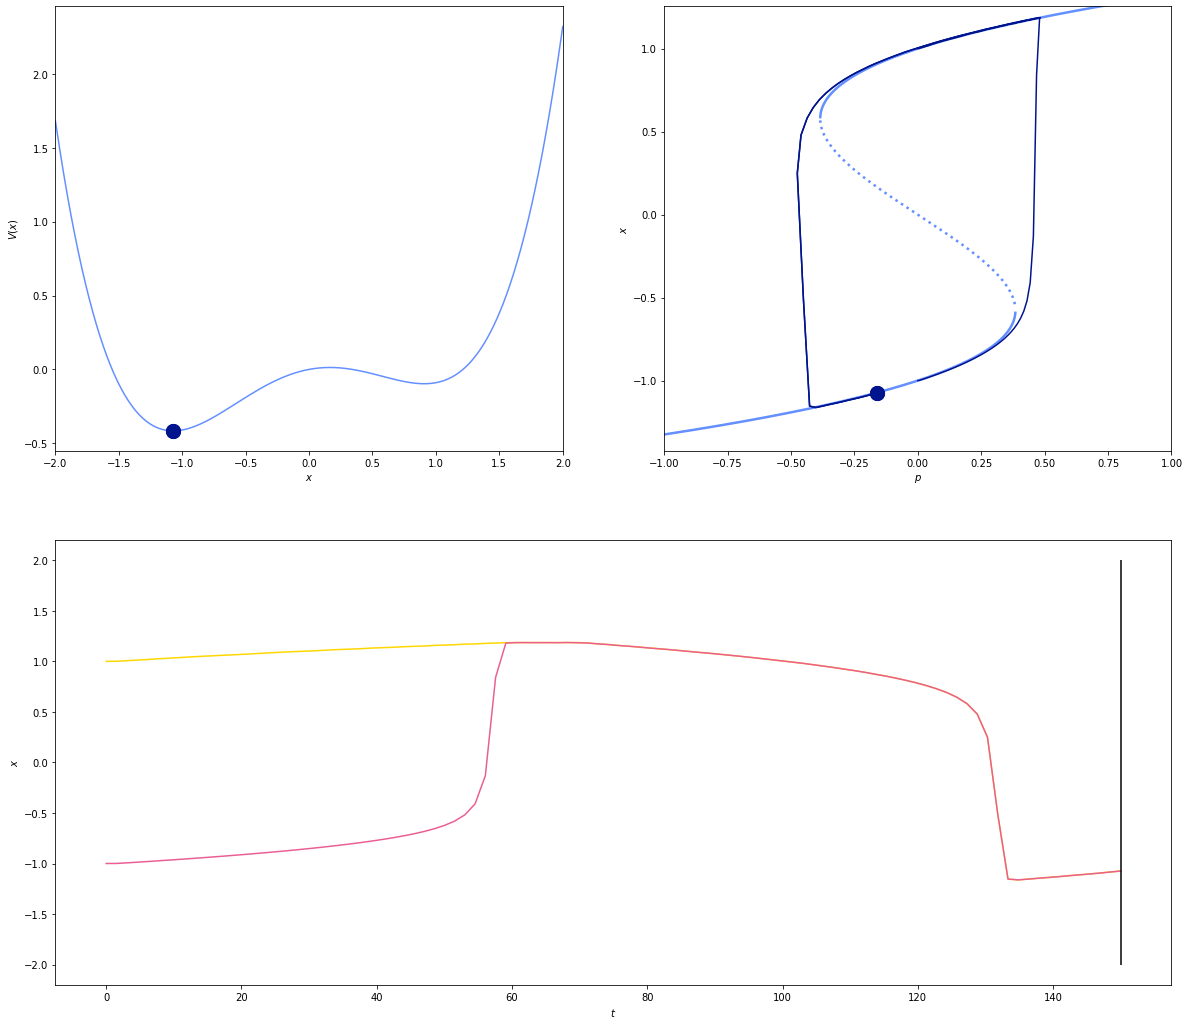

In [15]:
t = 150
b_tipping_model.plot_composite(ics=[1., -1.], t_traj=np.linspace(0, 100, 500), t=t)

/home/ohamilton/.local/lib/python3.8/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


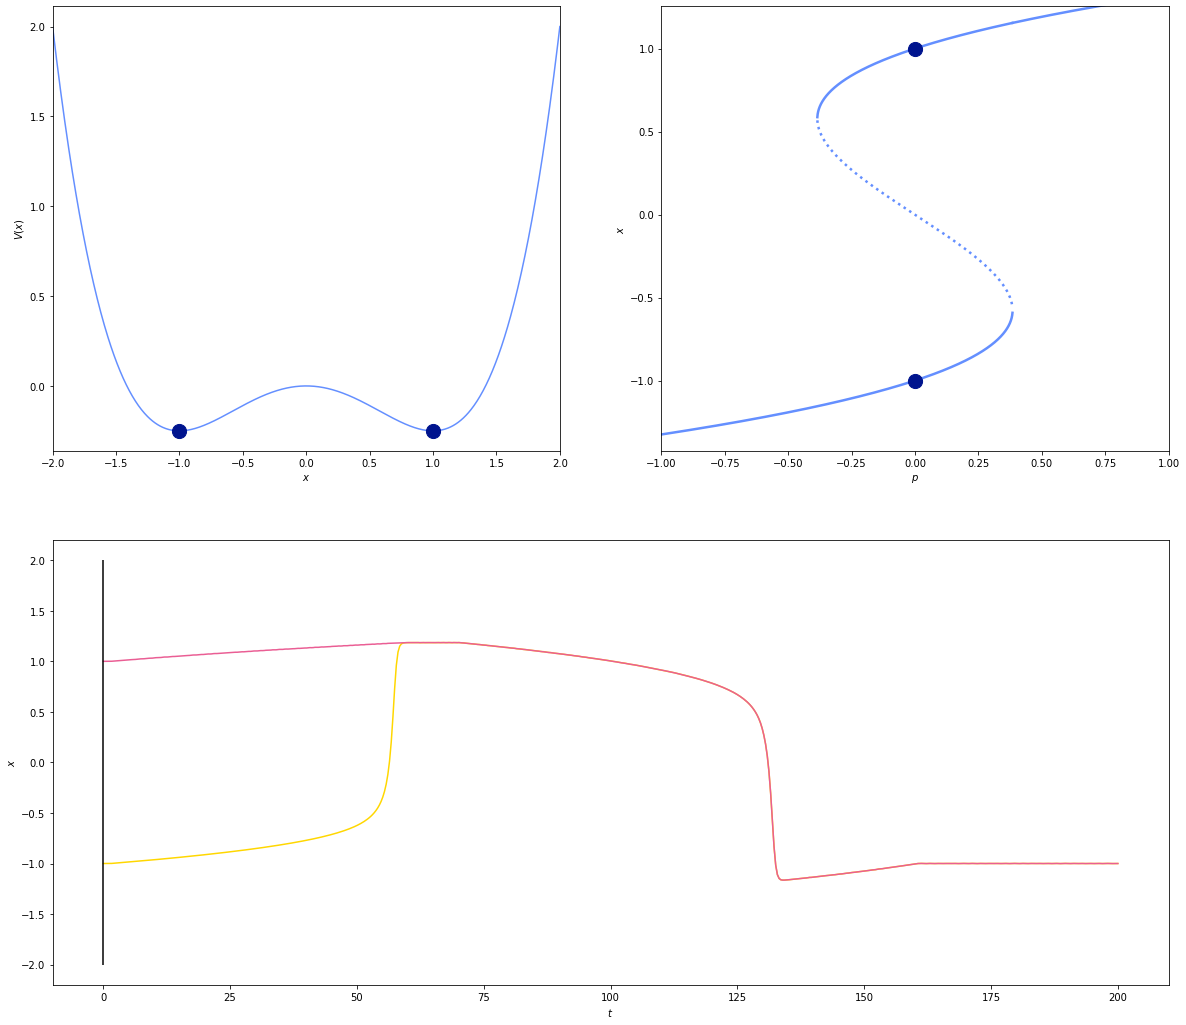

In [16]:
ani = b_tipping_model.animate_composite(ics=[-1., 1.], t=np.linspace(0, 200, 600))

In [17]:
# ani.save("historisis.mp4")

## Noise Induced Tipping

Define a function that describes the noise included in the model equations

In [18]:
def noise_func(t=0, x=0, p=0):
    return np.random.normal(scale=10, size=len(x))

In [19]:
noisy_stationary_model = model(a=1, noise_func=noise_func)

<AxesSubplot:xlabel='$p$', ylabel='$x$'>

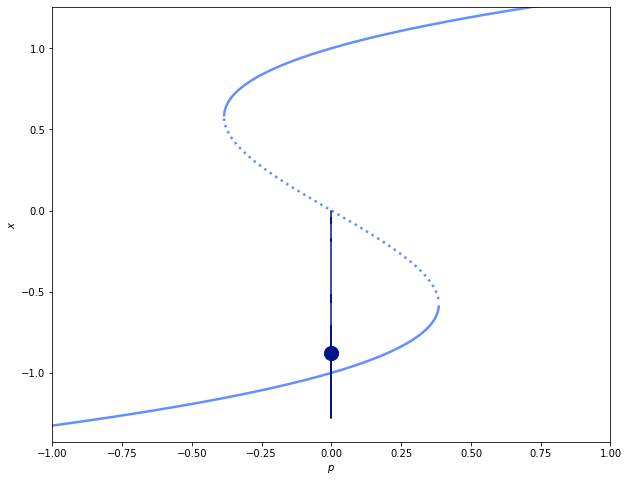

In [20]:
noisy_stationary_model.plot_bifurcation_plot_p(t=10)

(<Figure size 1440x1296 with 3 Axes>, <AxesSubplot:>)

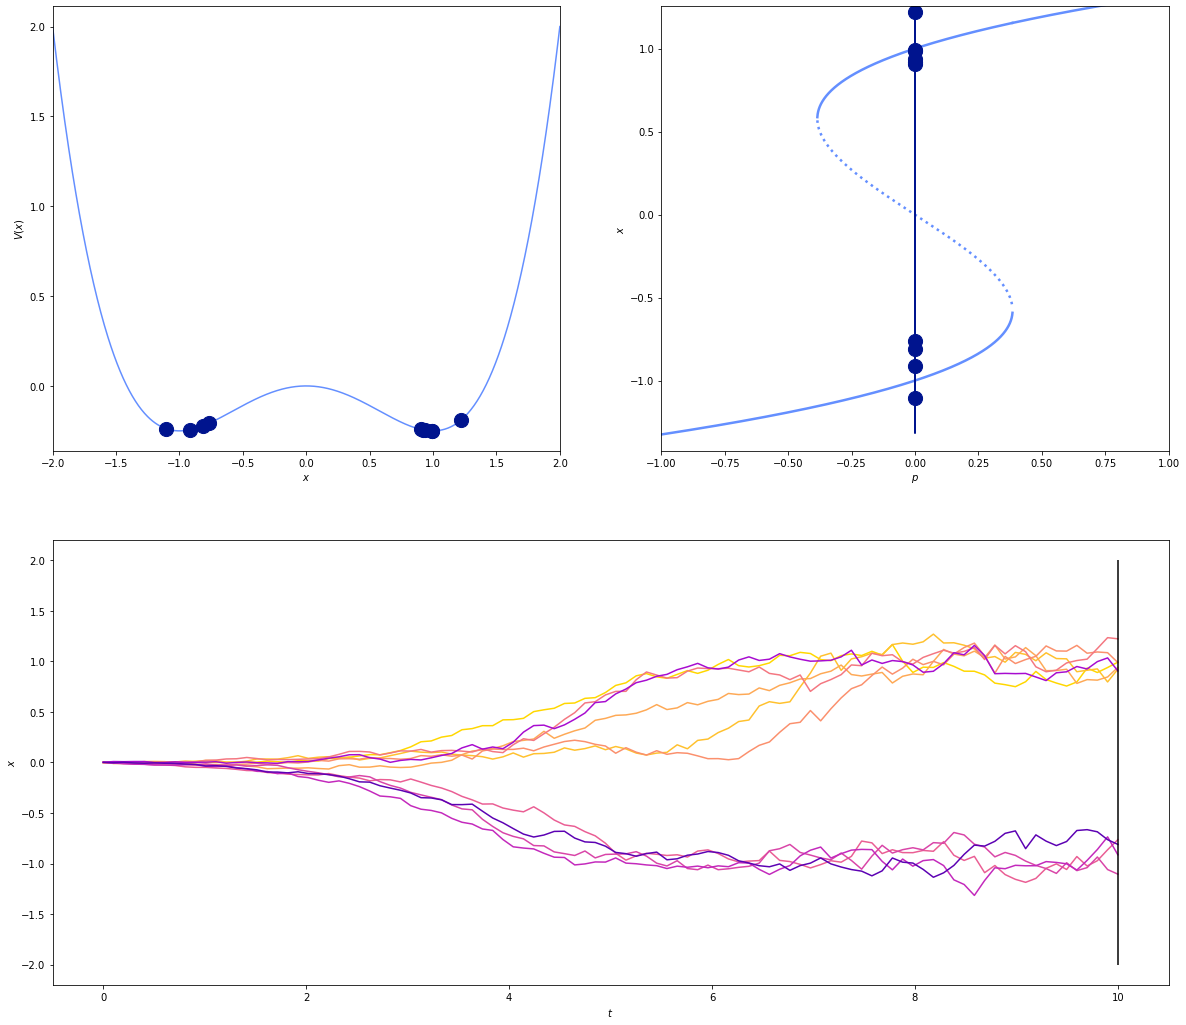

In [21]:
noisy_stationary_model.plot_composite(ics=np.linspace(-0.001, 0.001, 10), t=10)

We include a slight parameter change also, but this time we do not pass the critical threshold

In [22]:
def p_var(t):
    p_values = np.zeros_like(t) 
    p_values[t > 59] = 0.3 
    mask = (t >= 1) & (t <= 59)
    p_values[mask] = 0.3 * 1/58 * (t[mask] - 1)
    
    return p_values

In [23]:
noisy_moving_model = model(p_in_time=p_var, a=1, noise_func=noise_func)

(<Figure size 1440x1296 with 3 Axes>, <AxesSubplot:>)

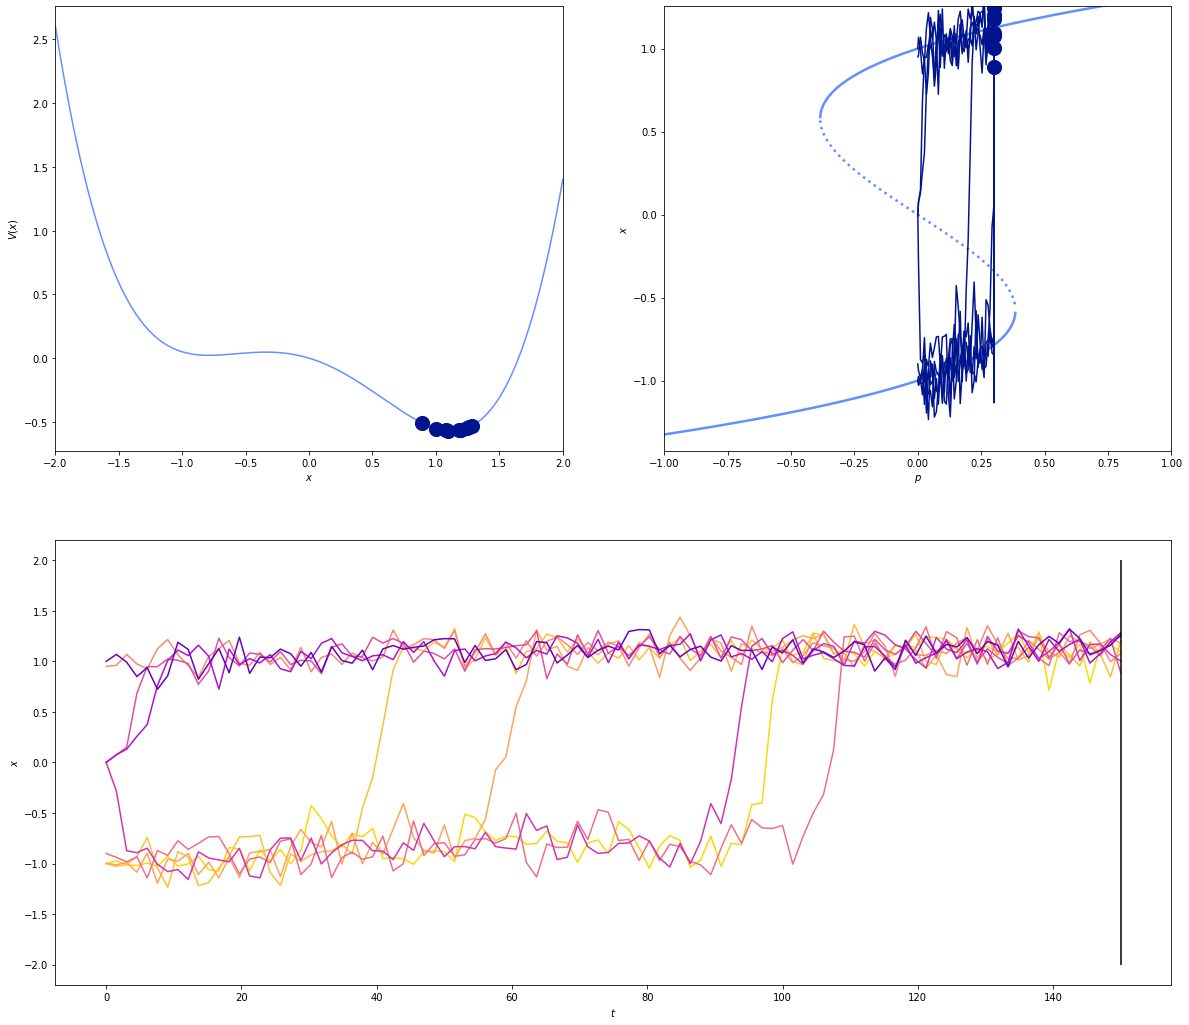

In [24]:
noisy_moving_model.plot_composite(ics=[-1., -1.001, -0.999, 0.95, -0.9, -0.001, 0., 0.001, 1.], t=150)

/home/ohamilton/.local/lib/python3.8/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


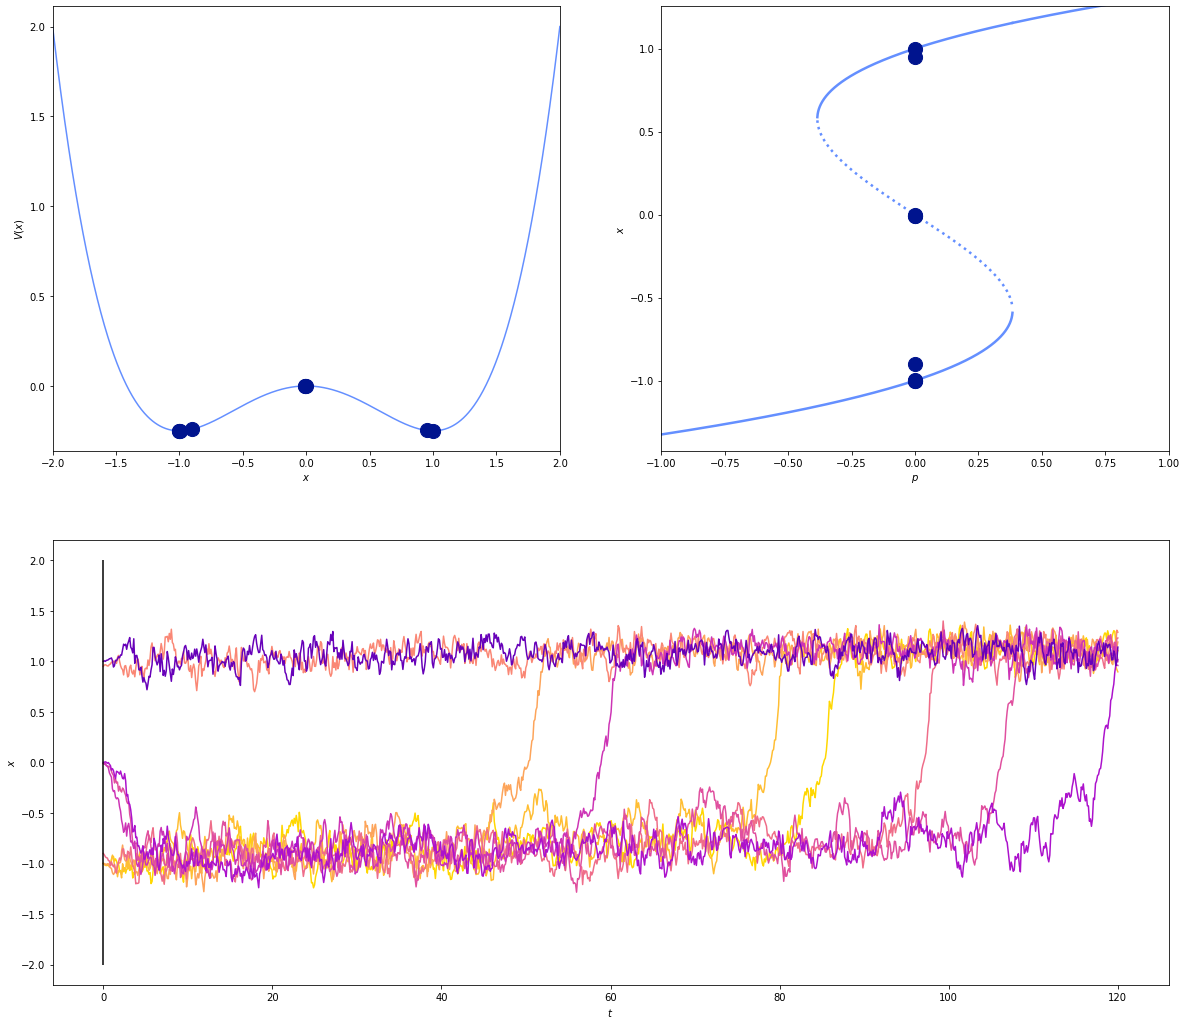

In [25]:
ani = noisy_moving_model.animate_composite(ics=[-1., -1.001, -0.999, 0.95, -0.9, -0.01, -0.01, 0.0, 1.], t=np.linspace(0, 120, 1000))

In [26]:
# ani.save("noise_tipping.mp4")

## Rate induced

In [29]:
def fast_rate_function(t, x, p):
    p_values = np.zeros_like(t) 
    start = 5
    end = 6.5
    diff = 1.5
    p_values[t > end] = diff 
    mask = (t >= start) & (t <= end)
    p_values[mask] =  diff * 1/(end - start) * (t[mask] - start)
    
    return p_values

In [30]:
def slow_rate_function(t, x, p):
    p_values = np.zeros_like(t) 
    start = 5
    end = 7.
    diff = 1.5
    p_values[t > end] = diff 
    mask = (t >= start) & (t <= end)
    p_values[mask] =  diff * 1/(end - start) * (t[mask] - start)
    
    return p_values

In [31]:
rate_enduced_model = model(rate_function=fast_rate_function)

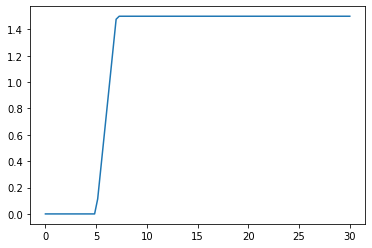

In [32]:
t = np.linspace(0, 30, 100)
plt.plot(t, slow_rate_function(t, 0, 0))

(<Figure size 1440x1296 with 3 Axes>, <AxesSubplot:>)

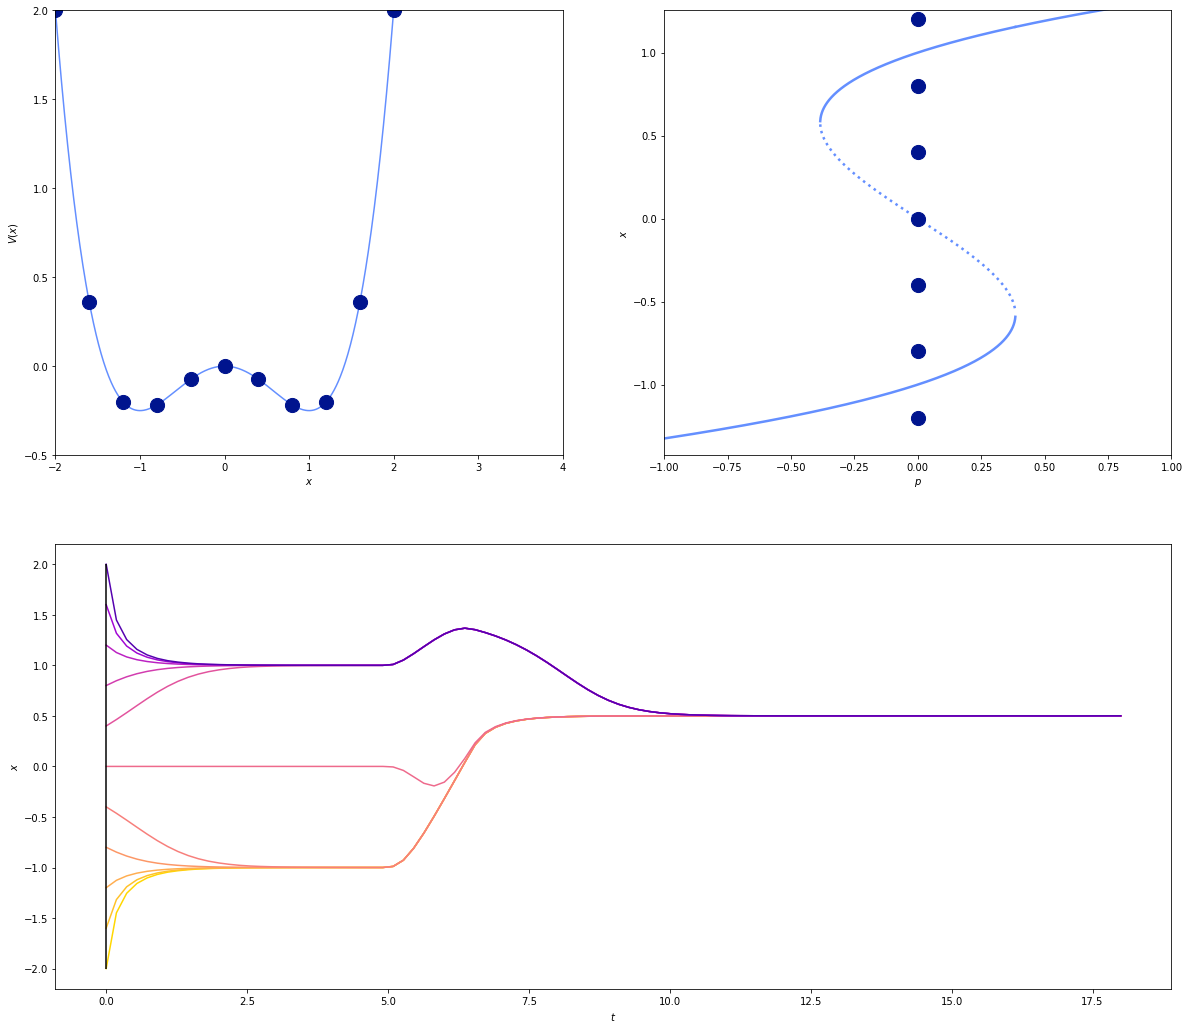

In [33]:
rate_enduced_model.plot_composite(ics=np.linspace(-2, 2, 11), t=0, t_traj=np.linspace(0, 18, 100), ball_plot_lims=((-2, 4), (-0.5, 2)))

/home/ohamilton/.local/lib/python3.8/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


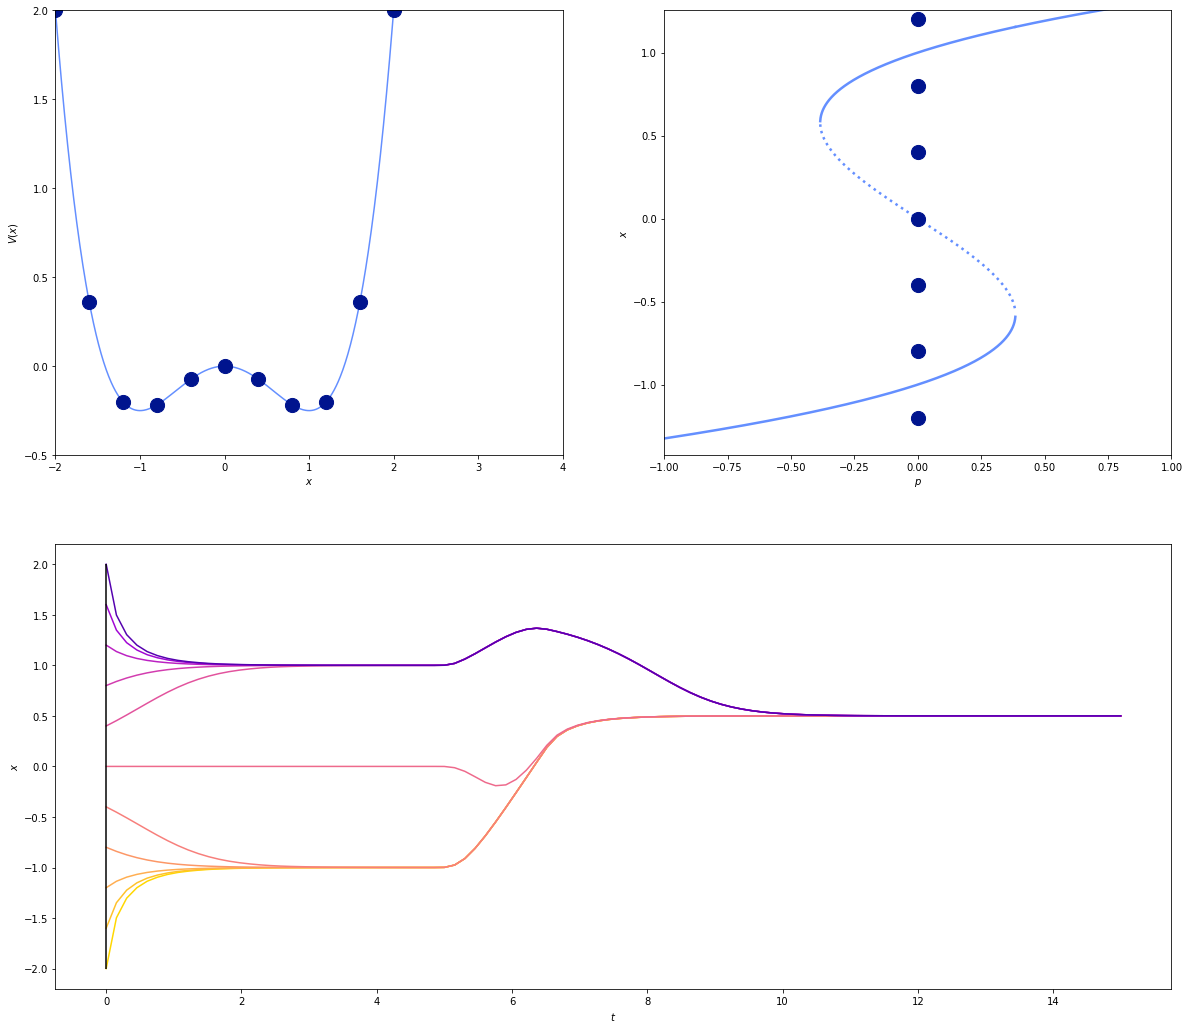

In [34]:
ani = rate_enduced_model.animate_composite(ics=np.linspace(-2, 2, 11), t=np.linspace(0, 15, 100), ball_plot_lims=((-2, 4), (-0.5, 2)))

In [35]:
# ani.save("rate_tipping.mp4")

Now the same but with a slower rate

In [36]:
rate_enduced_model = model(rate_function=slow_rate_function)

(<Figure size 1440x1296 with 3 Axes>, <AxesSubplot:>)

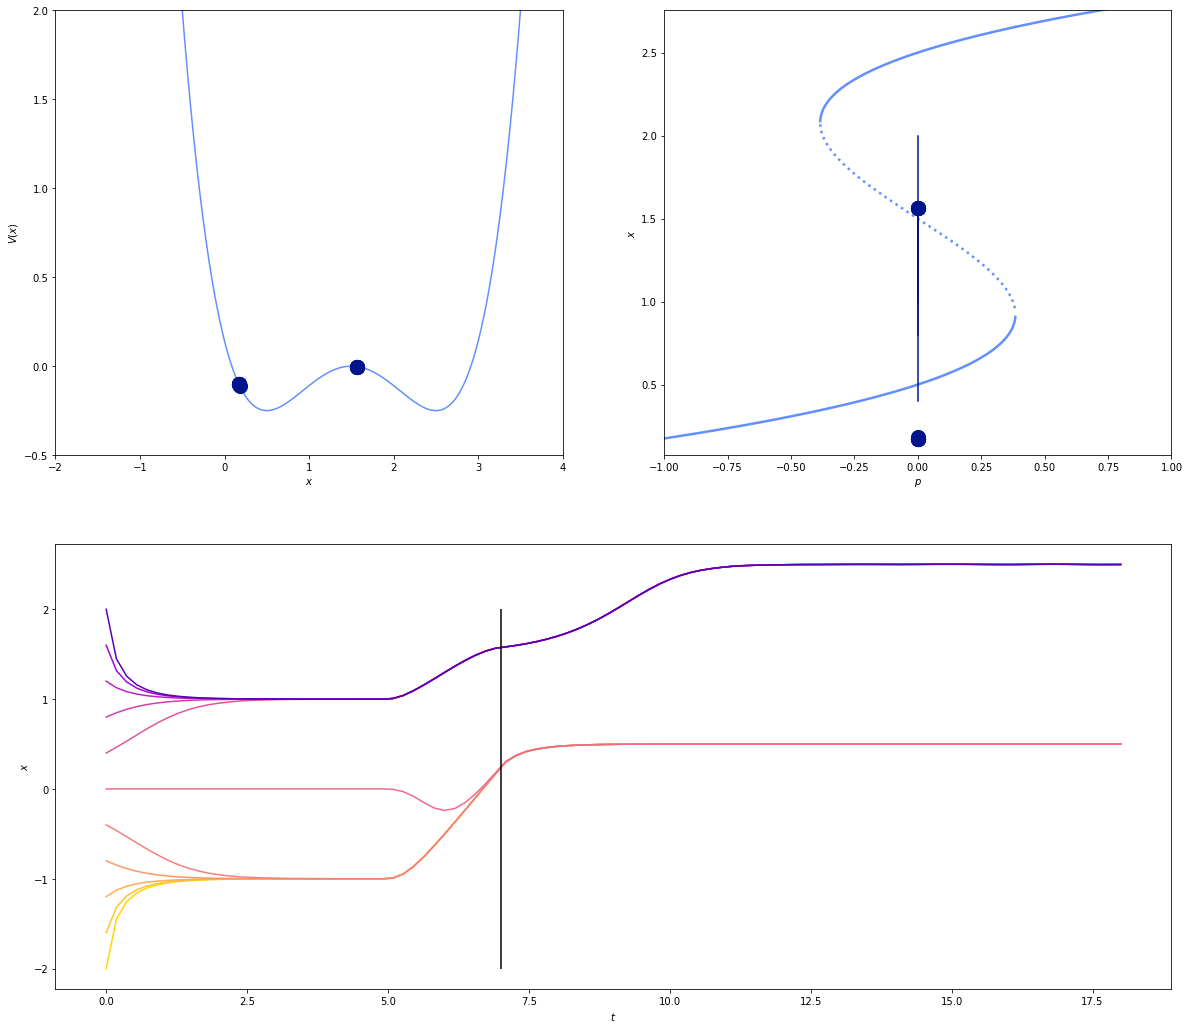

In [37]:
rate_enduced_model.plot_composite(ics=np.linspace(-2, 2, 11), t=7., t_traj=np.linspace(0, 18, 100), ball_plot_lims=((-2, 4), (-0.5, 2)))

/home/ohamilton/.local/lib/python3.8/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


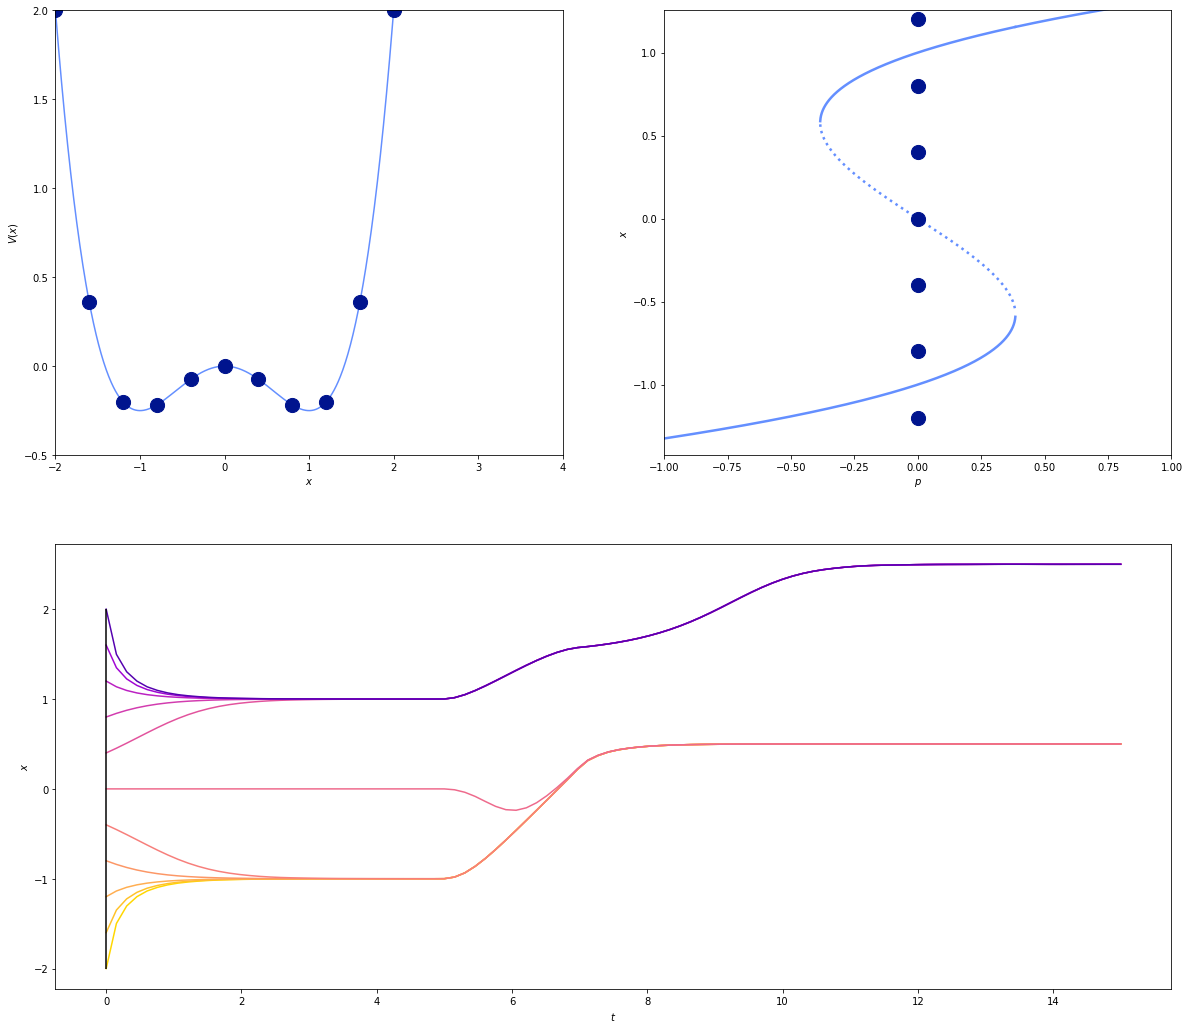

In [38]:
ani = rate_enduced_model.animate_composite(ics=np.linspace(-2, 2, 11), t=np.linspace(0, 15, 100), ball_plot_lims=((-2, 4), (-0.5, 2)))

In [39]:
# ani.save("slow_rate_tipping.mp4")

### Stability landscape

In [40]:
x = np.linspace(-2.5, 2.5, 100)
p = np.linspace(-2, 2, 100)

X, P = np.meshgrid(x, p)

basic_model = model()

In [41]:
V = np.empty_like(X)
for i, p_val in enumerate(p):
    V[i, :] = basic_model.potential(t=0, x=x, p_vals=p_val)

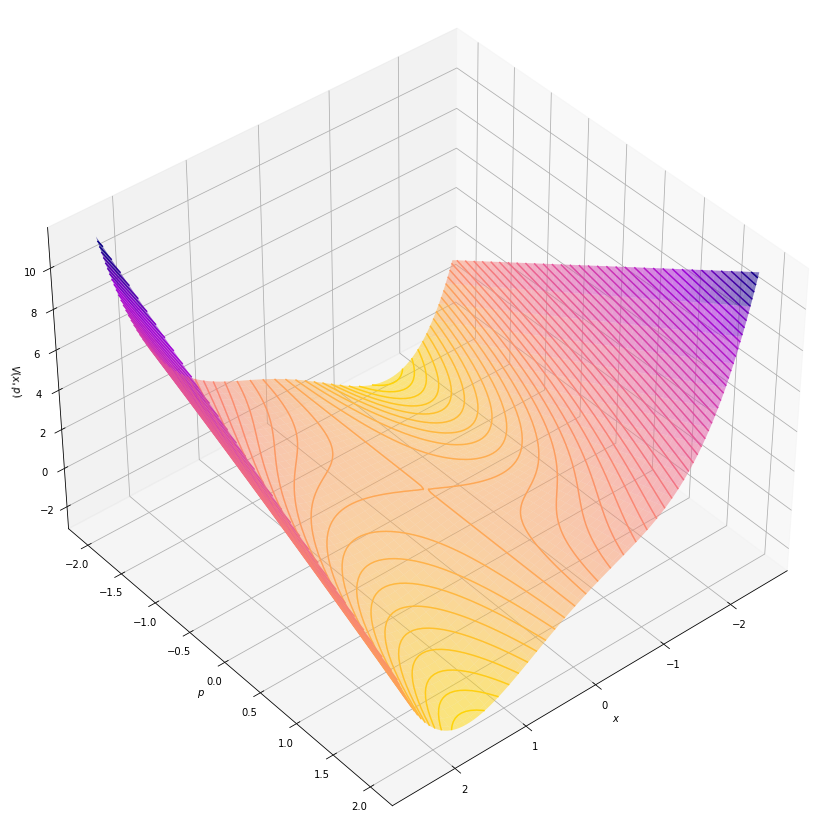

In [42]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, P, V, cmap=cmap, alpha=0.5)
ax.contour3D(X, P, V, 50, cmap=cmap, zorder=2)


# ax.set_zlim(0, 1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$p$')
ax.set_zlabel(r'$V(x, p)$')

ax.view_init(40, 50)